In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from tableone import TableOne
wd = '/Users/timvigers/Dropbox/Work/Kim Driscoll/BBGD/'

In [2]:
# Read in data
df = pd.read_csv(wd+'Data_Clean/bbgd_master.csv')

# Participant and Data Characteristics

## Table 1: Participant Characteristics at Visit 1

In [3]:
# Make pretty variables for Table 1
df["Private Insurance"] = ['Yes' if i == 1 else 'No' if i==0 else np.nan for i in df['p_insurance_commercial']]
df["Total Household Income"] = df["par_income"].replace({1:"Under $5K",2:"$5K-$9,999",3:"$10K-$19,999",4:"$20K-29,999", 
                                                   5:"$30K-39,999",6:"$40K-49,999",7:"$50K-59,999",8:"$60K-69,999",
                                                   9:"$70K-79,999",10:"$80K-89,999",11:"$90K-99,999",12:"$100K +"})
df["Parent's Marital Status"] = df["par_marital"].replace({1:"Married to Child's Biologic Father",2:"Married to Child's Stepfather", 
                                                  3:"Separated",4:"Divorced",5:"Widowed",6:"Single",7:"Living with Domestic Partner"})
df["Highest Degree Parent Completed"] = df["par_degree"].replace({1:"No Degree",2:"High School",3:"Associate's",4:"Bachelor's",
                                                                  5:"Master's",6:"Doctoral"})
df["Parent Ethnicity"] = df["par_ethnicity"].replace({1:"Hispanic or Latino",2:"Not Hispanic or Latino"})
df["Parent Race"] = df["par_race"].replace({1:"American Indian or Alaskan Native",2:"Asian",3:"Black or African American",
                                            4:"Native Hawaiian or Pacific Islander",5:"White"})
df["Primary Male Caretaker"] = df["par_race"].replace({1:"Father",2:"Stepfather",3:"Grandfather",4:"Uncle",5:"Mother's boyfriend/partner",6:"Other"})
# Main outcomes
df["Parent Maintain High BG of HFS"] = df["p_maintain_high"]
df["Parent Worry/Helplessness Subscale of HFS"] = df["p_helpless"]
df["Parent Social Consequences Subscale of HFS"] = df["p_social"]
df["Parent GAD-7 Score"] = df["p_gad_total"]
# Make table 1
cols = ["Parent Maintain High BG of HFS","Parent Worry/Helplessness Subscale of HFS",
        "Parent Social Consequences Subscale of HFS","Parent GAD-7 Score",
        "Private Insurance","Total Household Income","Parent's Marital Status",
       "Highest Degree Parent Completed","Parent Race","Parent Ethnicity","Primary Male Caretaker"]

# Print
t1 = TableOne(df.query("studyvisit == 1"),columns=cols,groupby='treatment_group',pval=True,display_all=True,
             normal_test=True,tukey_test=True,dip_test=True)
t1

Grouped by treatment_group                                            
                                                                                                             Missing     Overall           0           1 P-Value
n                                                                                                                             43          22          21        
Parent Maintain High BG of HFS, mean (SD)                                                                          1   6.5 (2.8)   6.0 (3.0)   7.0 (2.6)   0.303
Parent Worry/Helplessness Subscale of HFS, mean (SD)                                                               0  22.2 (6.4)  20.1 (5.9)  24.3 (6.2)   0.027
Parent Social Consequences Subscale of HFS, mean (SD)                                                              1   4.9 (3.2)   4.1 (2.6)   5.7 (3.6)   0.115
Parent GAD-7 Score, mean (SD)                                                                                      0  13.5 (4.9)  12.3 (3.9)  14.7 (5.6)   0.116
Private Insurance, n (%)                              No                                                           0   11 (25.6)    5 (22.7)    6 (28.6)   0.929
                                                      Yes                                                              32 (74.4)   17 (77.3)   15 (71.4)        
Total Household Income, n (%)                         $100K +                                                      2   18 (43.9)    9 (40.9)    9 (47.4)   0.902
                                                      $20K-29,999                                                        3 (7.3)     2 (9.1)     1 (5.3)        
                                                      $30K-39,999                                                        3 (7.3)     2 (9.1)     1 (5.3)        
                                                      $40K-49,999                                                        2 (4.9)     2 (9.1)                    
                                                      $50K-59,999                                                        3 (7.3)     1 (4.5)    2 (10.5)        
                                                      $60K-69,999                                                        2 (4.9)     1 (4.5)     1 (5.3)        
                                                      $70K-79,999                                                        4 (9.8)     2 (9.1)    2 (10.5)        
                                                      $80K-89,999                                                        2 (4.9)     1 (4.5)     1 (5.3)        
                                                      $90K-99,999                                                        3 (7.3)     2 (9.1)     1 (5.3)        
                                                      Under $5K                                                          1 (2.4)                 1 (5.3)        
Parent's Marital Status, n (%)                        Divorced                                                     1    8 (19.0)    3 (14.3)    5 (23.8)   0.201
                                                      Living with Domestic Partner                                       2 (4.8)                 2 (9.5)        
                                                      Married to Child's Biologic Father                               30 (71.4)   16 (76.2)   14 (66.7)        
                                                      Widowed                                                            2 (4.8)     2 (9.5)                    
Highest Degree Parent Completed, n (%)                Associate's                                                  0    6 (14.0)                6 (28.6)   0.090
                                                      Bachelor's                                                       17 (39.5)    9 (40.9)    8 (38.1)        
                                                      Doctoral   

Highest Degree Parent Completed, Total Household Income, and Parent's Marital Status were not significant by Fisher's exact test either (p = 0.063, 0.969, and 0.297 respectively).

## Outcome Plots

Two of the four outcomes were reasonably normally distributed, but 'p_social' and 'p_gad_total' were skewed and unable to be log-transformed due to many 0 values.

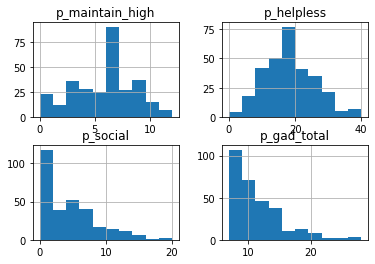

In [4]:
# Define main outcomes
var_list = ["p_maintain_high","p_helpless","p_social","p_gad_total"]
df[var_list].hist();# Semicolon hides the matplotlib descriptions in Jupyter

# Model Results
All four outcomes were modeled using 

In [5]:
# Define adjustment variables
adj_list = ["c_gender","par_income"]
# Fill down 
df[adj_list] = df.groupby('participant_id')[adj_list].ffill()
# Cut income into three levels
df['par_income'] = pd.cut(df['par_income'],[0,4,8,12])
# Make categorical
df[adj_list] = df[adj_list].astype('category')

In [6]:
# Fit a random intercept for each participant, adjusted for sex, income, and T1D durationdf[['id'] + cols] = df.groupby('id')[cols].ffill().fillna(0).astype(int)
ri_mod = smf.mixedlm("p_maintain_high ~ studyvisit*treatment_group+c_gender+par_income", df, groups=df["participant_id"],missing = "drop")
mdf = ri_mod.fit()
print(mdf.summary())

                         Mixed Linear Model Regression Results
Model:                     MixedLM          Dependent Variable:          p_maintain_high
No. Observations:          285              Method:                      REML           
No. Groups:                41               Scale:                       2.9586         
Min. group size:           1                Log-Likelihood:              -602.7708      
Max. group size:           8                Converged:                   Yes            
Mean group size:           7.0                                                          
----------------------------------------------------------------------------------------
                                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept                                      4.708    1.129  4.172 0.000  2.496  6.920
c_gender[T.2.0]                                

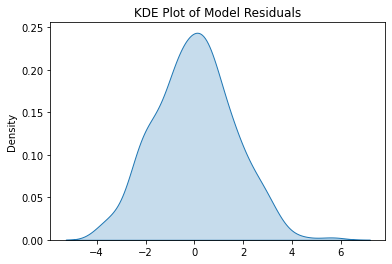

In [7]:
# Distribution
sns.kdeplot(mdf.resid, fill = True).set_title("KDE Plot of Model Residuals");

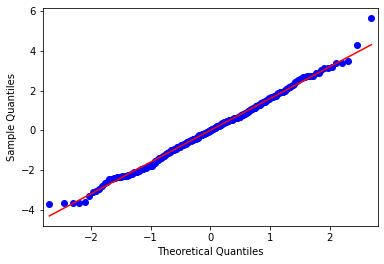

In [26]:
# import warnings;
# warnings.filterwarnings('ignore');
# QQ Plot
fig = sm.qqplot(mdf.resid,line = "s")
plt.show()

In [27]:
labels = ["Statistic", "p-value"]
norm_res = stats.shapiro(mdf.resid)
for key, val in dict(zip(labels, norm_res)).items():
    print(key, round(val,3))

Statistic 0.995
p-value 0.495


### Questions
1. Where would I find study visit date to calculate age?
2. I'm currently adjusting for child's gender, but would it make more sense to adjust for the gender of the survey taker? Where is this information?
3. Is there anything else we should adjust for?

In [18]:
round(norm_res)

TypeError: type ShapiroResult doesn't define __round__ method